In [85]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px 

# André Guarnier De Mitri - 11395579
# Thalles Diepes - 12675764

In [86]:
#players = pd.read_csv("/kaggle/input/fifa-world-cup/WorldCupPlayers.csv") #Acabamos nao utilizando esse csv em nossa analise
matches = pd.read_csv("WorldCupMatches.csv")
world_cup = pd.read_csv("WorldCups.csv")

# Visualização inicial dos dados

In [87]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [88]:
world_cup.tail()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
15,1998,France,France,Brazil,Croatia,Netherlands,171,32,64,2.785.100
16,2002,Korea/Japan,Brazil,Germany,Turkey,Korea Republic,161,32,64,2.705.197
17,2006,Germany,Italy,France,Germany,Portugal,147,32,64,3.359.439
18,2010,South Africa,Spain,Netherlands,Germany,Uruguay,145,32,64,3.178.856
19,2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


# Corrigindo alguns nomes

In [89]:
matches.dropna(subset=['Year'], inplace=True) #Removendo valores nulos
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts() #Alguns nomes estao errados e precisam ser arrumados
wrong = list(names.index) #Verifica os nomes errados
correct = [name.split('>')[1] for name in wrong] #Arruma os erros
old_name = ['Germany FR', 'Maracan� - Est�dio Jornalista M�rio Filho', 'Estadio do Maracana'] #Nomes que precisam ser modificadoos
new_name = ['Germany', 'Maracan Stadium', 'Maracan Stadium'] #Modificacao realizada
wrong = wrong + old_name
correct = correct + new_name
wrong, correct

(['rn">Republic of Ireland',
  'rn">Trinidad and Tobago',
  'rn">Bosnia and Herzegovina',
  'rn">United Arab Emirates',
  'rn">Serbia and Montenegro',
  'Germany FR',
  'Maracan� - Est�dio Jornalista M�rio Filho',
  'Estadio do Maracana'],
 ['Republic of Ireland',
  'Trinidad and Tobago',
  'Bosnia and Herzegovina',
  'United Arab Emirates',
  'Serbia and Montenegro',
  'Germany',
  'Maracan Stadium',
  'Maracan Stadium'])

In [90]:
for index, wr in enumerate(wrong):
    world_cup = world_cup.replace(wrong[index], correct[index])
    
for index, wr in enumerate(wrong):
    matches = matches.replace(wrong[index], correct[index])
    
names = matches[matches['Home Team Name'].str.contains('rn">')]['Home Team Name'].value_counts()
names

Series([], Name: Home Team Name, dtype: int64)

# Sera times quem os times que tem mando de campo tem melhor desempenho?

### Grafico de linhas

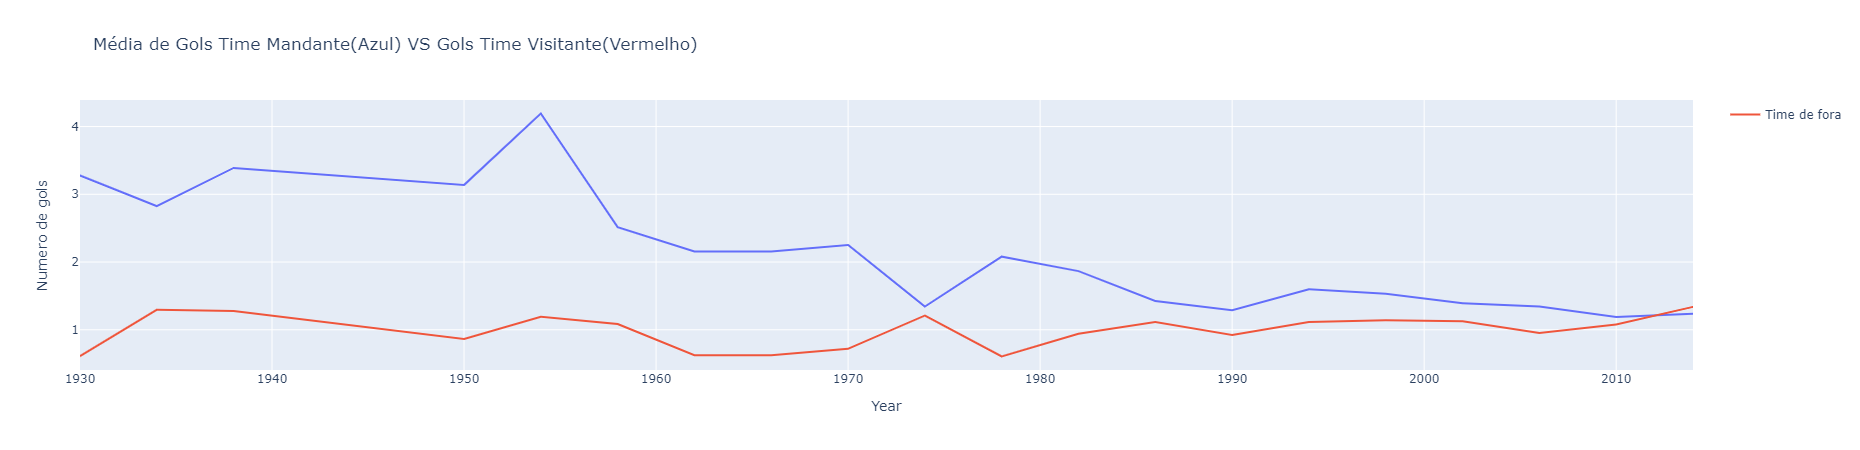

In [91]:
#Criando uma pivot table para armazenamento dos dados
casa = pd.pivot_table(matches,values="Home Team Goals",index='Year')
fora = pd.pivot_table(matches,values="Away Team Goals",index='Year')

#Grafico
fig = px.line(casa, x=casa.index, y='Home Team Goals',  title="Média de Gols Time Mandante(Azul) VS Gols Time Visitante(Vermelho)", labels = {"Home Team Goals": "Numero de gols"})
fig.add_scatter(x=fora.index, y=fora["Away Team Goals"], mode='lines', name = "Time de fora")

fig.show()

### Grafico de Pizza

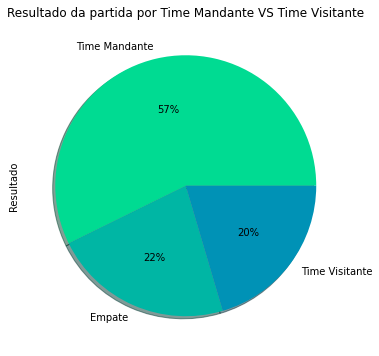

In [92]:
def get_labels(matches):
    if matches['Home Team Goals'] > matches['Away Team Goals']:
        return 'Time Mandante'
    if matches['Home Team Goals'] < matches['Away Team Goals']:
        return 'Time Visitante'
    return 'Empate'
matches['Resultado'] = matches.apply(lambda x: get_labels(x), axis=1)
mt = matches['Resultado'].value_counts()
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

plt.title('Resultado da partida por Time Mandante VS Time Visitante')
plt.show()

# Quais são os paises que mais vencem?

In [93]:
winner = world_cup['Winner'].value_counts() #Primeiro
runnerup = world_cup['Runners-Up'].value_counts() #Segundo
third = world_cup['Third'].value_counts() #Terceiro

In [94]:
teams = pd.concat([winner, runnerup, third], axis=1) #Concatenando em um dataframe para o resultado
teams.fillna(0, inplace=True)
teams = teams.astype(int)
teams

,Winner,Runners-Up,Third
Brazil,5,2,2
Italy,4,2,1
Germany,4,4,4
Uruguay,2,0,0
Argentina,2,3,0
Spain,1,0,0
France,1,1,2
England,1,0,0
Netherlands,0,3,1
Czechoslovakia,0,2,0


In [95]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

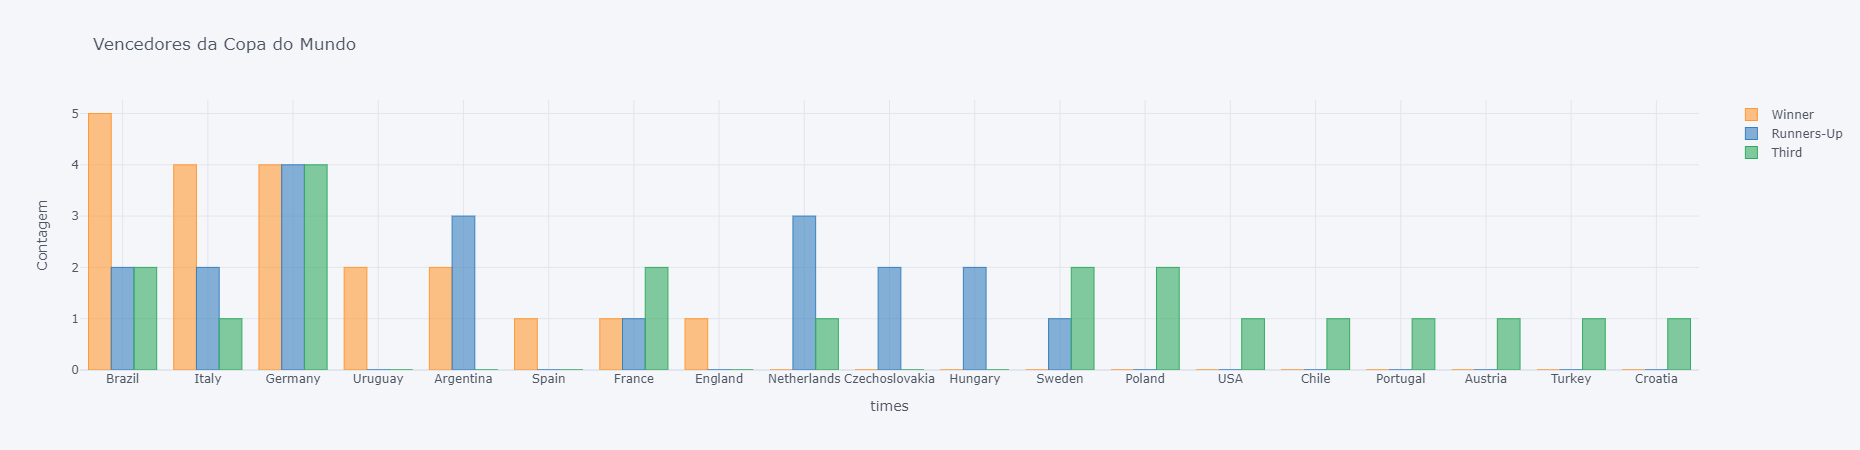

In [96]:
teams.iplot(kind = 'bar', xTitle='times', yTitle='Contagem', title='Vencedores da Copa do Mundo')

# Quais paises fazem mais gols?

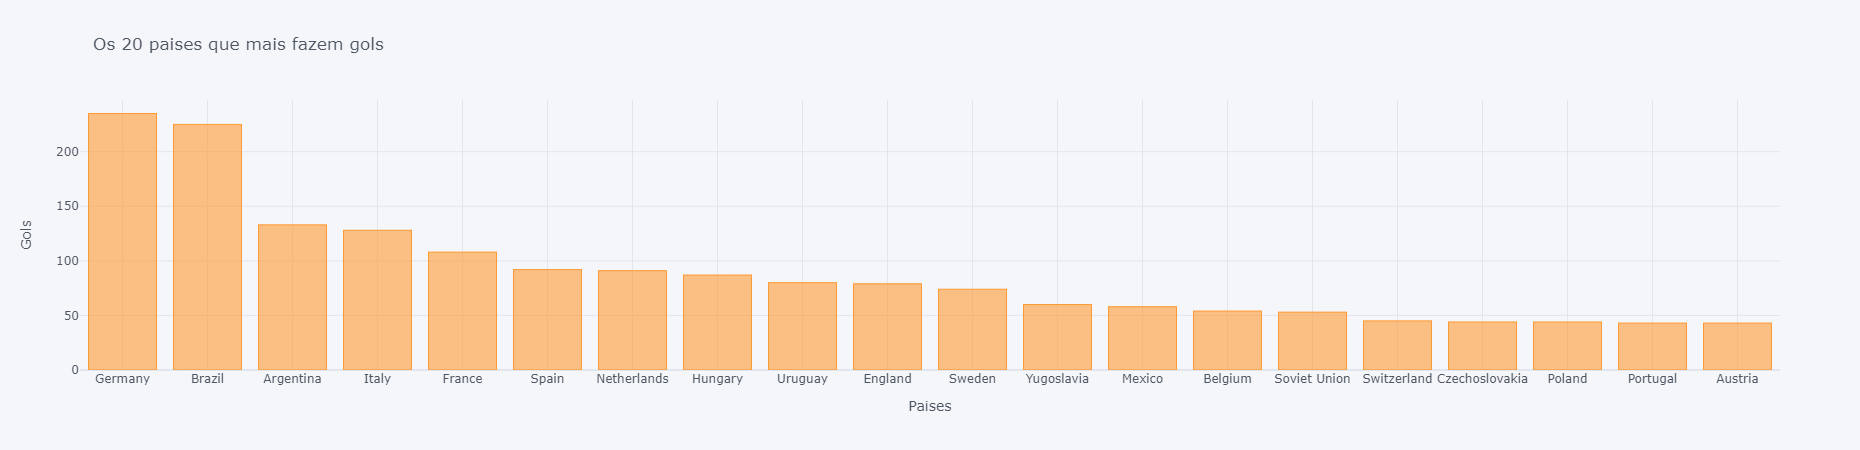

In [97]:
casa = matches[['Home Team Name', 'Home Team Goals']].dropna() #Removendo nulos e filtrando as 2 colunas
fora = matches[['Away Team Name', 'Away Team Goals']].dropna()
casa.columns = ['Countries', 'Goals'] #Time da casa
fora.columns = casa.columns
gols = casa.append(fora, ignore_index = True)
gols = gols.groupby('Countries').sum()
gols = gols.sort_values(by = 'Goals', ascending=False)
gols[:20].iplot(kind='bar', xTitle = 'Paises', yTitle = 'Gols', title = 'Os 20 paises que mais fazem gols')

### Medidas de Posição

In [98]:
medida_de_posicao = world_cup[world_cup["Winner"] == "Germany"]
medidas_de_posicao = medida_de_posicao.drop(["Year"], axis = 1)
print("Alemanha")
round(medidas_de_posicao.describe(), 2)

Alemanha


,GoalsScored,QualifiedTeams,MatchesPlayed
count,4.00,4.00,4.00
mean,130.75,22.00,45.00
std,32.11,7.66,16.53
min,97.00,16.00,26.00
25%,110.50,16.00,35.00
50%,127.50,20.00,45.00
75%,147.75,26.00,55.00
max,171.00,32.00,64.00


In [99]:
medida_de_posicao = world_cup[world_cup["Winner"] == "Brazil"]
medidas_de_posicao = medida_de_posicao.drop(["Year"], axis = 1)
round(medidas_de_posicao.describe(), 2)
print("Brasil")
round(medidas_de_posicao.describe(), 2)

Brasil


,GoalsScored,QualifiedTeams,MatchesPlayed
count,5.00,5.00,5.00
mean,122.40,20.80,43.00
std,30.48,7.16,14.39
min,89.00,16.00,32.00
25%,95.00,16.00,32.00
50%,126.00,16.00,35.00
75%,141.00,24.00,52.00
max,161.00,32.00,64.00


In [100]:
medida_de_posicao = world_cup[world_cup["Winner"] == "Italy"]
medidas_de_posicao = medida_de_posicao.drop(["Year"], axis = 1)
print("Italia")
round(medidas_de_posicao.describe(), 2)

Italia


,GoalsScored,QualifiedTeams,MatchesPlayed
count,4.00,4.00,4.00
mean,111.75,21.75,37.75
std,40.53,7.93,23.89
min,70.00,15.00,17.00
25%,80.50,15.75,17.75
50%,115.00,20.00,35.00
75%,146.25,26.00,55.00
max,147.00,32.00,64.00


# Representação Geografica com Mapa de Calor interativo

### As vitorias totais que devem estar no proximo dataframe

In [101]:
#Total de vitorias
df = world_cup[['Year', 'Winner']].dropna()
print("Vitorias totais:")
df["Winner"].value_counts()

Vitorias totais:


Brazil       5
Italy        4
Germany      4
Uruguay      2
Argentina    2
Spain        1
France       1
England      1
Name: Winner, dtype: int64

### Um dataframe com o total de vitorias por ano

In [102]:
df["Vitorias Totais"] = 0
df["Winner"][7] = "UK" #Concertando um nome

#Acrescentando o numero de vitorias por ano
for x in df["Winner"].unique():
    temp = 0
    for i in df.index:
        if (x == df["Winner"][i]):
            df["Vitorias Totais"][i] = temp + 1
            temp = df["Vitorias Totais"][i]
df

,Year,Winner,Vitorias Totais
0,1930,Uruguay,1
1,1934,Italy,1
2,1938,Italy,2
3,1950,Uruguay,2
4,1954,Germany,1
5,1958,Brazil,1
6,1962,Brazil,2
7,1966,UK,1
8,1970,Brazil,3
9,1974,Germany,2


### Mapa mundi de calor

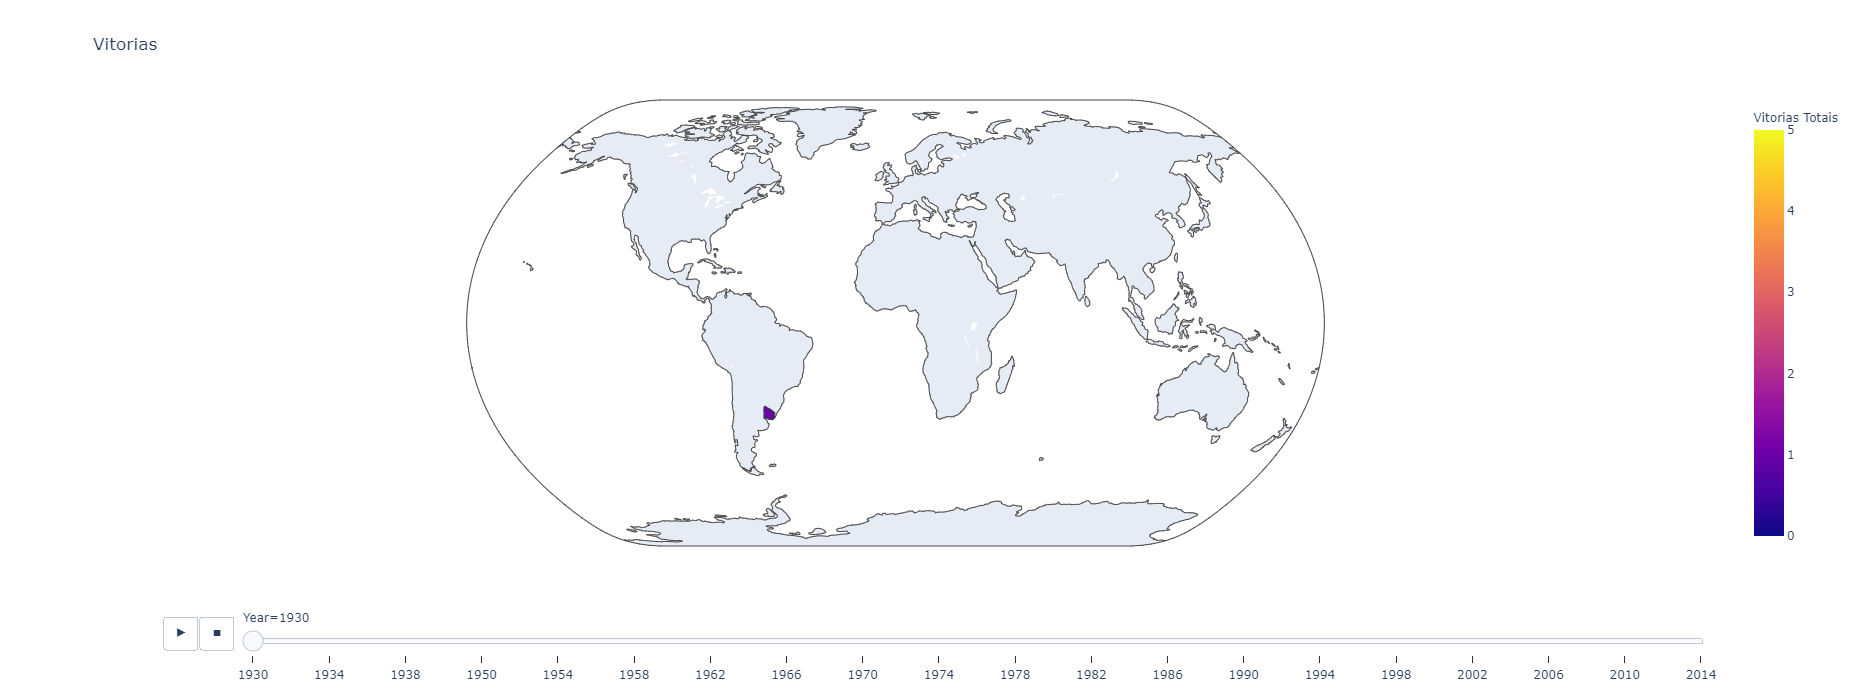

In [103]:
fig = px.choropleth(df, locations="Winner", locationmode="country names", color="Vitorias Totais", animation_frame = 'Year', hover_name="Winner", hover_data=["Vitorias Totais"], range_color=(0, 5),
                     projection="natural earth",title = "Vitorias")
                    
fig.update_layout(autosize=False, width=1800, height=700)
fig.show()